In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better plots
sns.set_style("whitegrid")

In [2]:
file_path = r"C:\Users\HARSHITHA\Downloads\price_paid_records.csv.zip"
df = pd.read_csv(file_path, compression="zip")

df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


In [3]:
df.columns = df.columns.str.strip()
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only'],
      dtype='object')

In [4]:
df["Date of Transfer"] = pd.to_datetime(df["Date of Transfer"])

In [5]:
df["Year"] = df["Date of Transfer"].dt.year
df["Month"] = df["Date of Transfer"].dt.month

In [6]:
total_sales = df["Price"].count()
total_sales

np.int64(22489348)

In [7]:
total_value = df["Price"].sum()
total_value

np.int64(4008596114625)

In [8]:
avg_price = df["Price"].mean()
avg_price

np.float64(178244.21208765145)

In [9]:
min_price = df["Price"].min()
max_price = df["Price"].max()

(min_price, max_price)

(1, 98900000)

In [10]:
price_by_property_type = df.groupby("Property Type")["Price"].mean()
price_by_property_type

Property Type
D    2.500975e+05
F    1.749829e+05
O    1.295774e+06
S    1.489675e+05
T    1.365340e+05
Name: Price, dtype: float64

In [11]:
sales_by_year = df.groupby("Year")["Price"].count()
sales_by_year

Year
1995     796777
1996     964695
1997    1093669
1998    1049739
1999    1194064
2000    1128742
2001    1245112
2002    1351256
2003    1257140
2004    1270409
2005    1061686
2006    1326161
2007    1272921
2008     650492
2009     625662
2010     663342
2011     661055
2012     668295
2013     810111
2014     982943
2015    1007421
2016    1032558
2017     375098
Name: Price, dtype: int64

In [12]:
avg_price_by_year = df.groupby("Year")["Price"].mean()
avg_price_by_year

Year
1995     67899.873622
1996     71465.170036
1997     78493.316723
1998     85394.512425
1999     95988.000966
2000    107425.569802
2001    118834.968796
2002    137879.274002
2003    155691.961092
2004    178337.254768
2005    189252.174614
2006    203416.399709
2007    219234.755521
2008    216817.782824
2009    213274.319075
2010    235969.016476
2011    232599.706086
2012    238291.130772
2013    256852.378274
2014    279107.479977
2015    296040.919151
2016    309769.165996
2017    328828.458667
Name: Price, dtype: float64

In [13]:
df["Price"].agg(["count", "mean", "min", "max", "median", "std"])

count     2.248935e+07
mean      1.782442e+05
min       1.000000e+00
max       9.890000e+07
median    1.300000e+05
std       3.903677e+05
Name: Price, dtype: float64

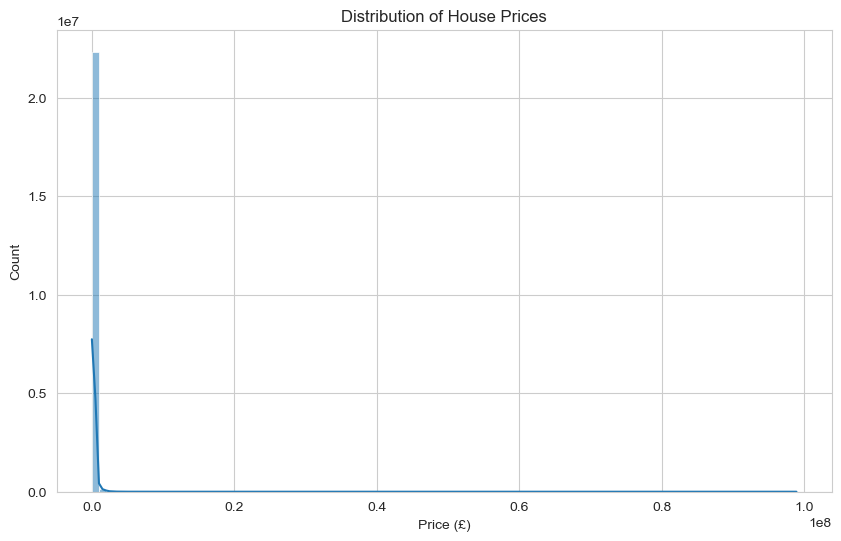

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df["Price"], bins=100, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

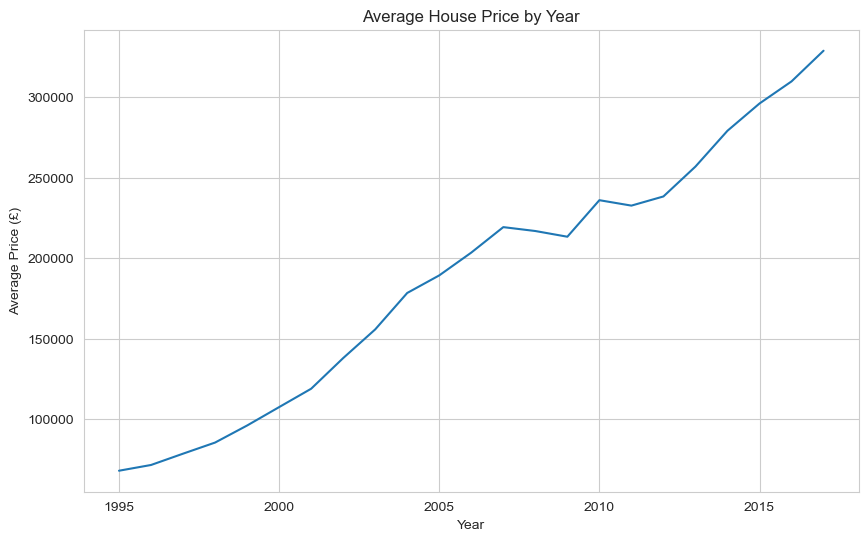

In [15]:
plt.figure(figsize=(10,6))
avg_price_by_year.plot(kind="line")
plt.title("Average House Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.show()

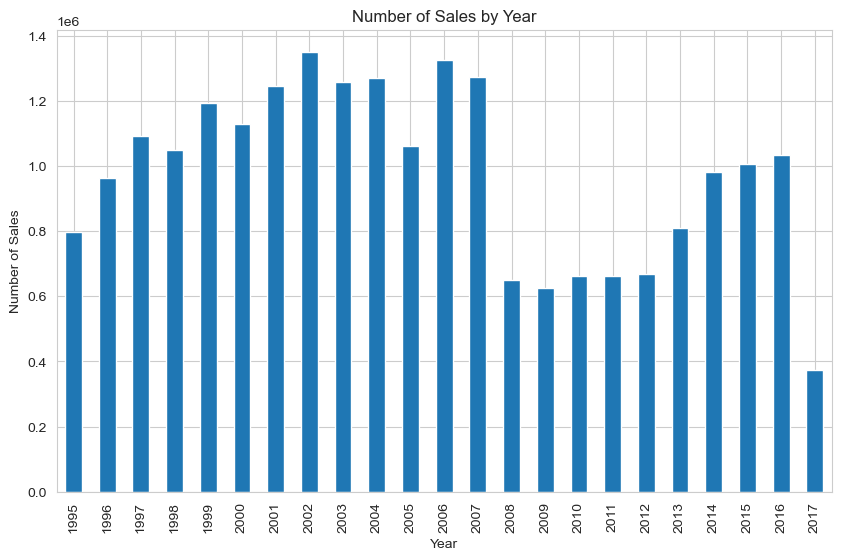

In [16]:
plt.figure(figsize=(10,6))
sales_by_year.plot(kind="bar")
plt.title("Number of Sales by Year")
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.show()

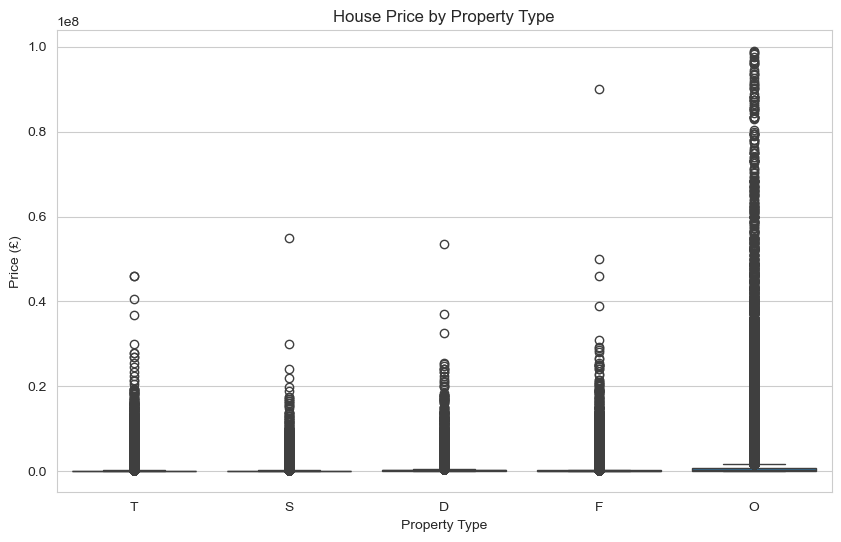

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Property Type", y="Price", data=df)
plt.title("House Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price (£)")
plt.show()

In [18]:
df.groupby("Duration")["Price"].mean()

Duration
F    182266.790913
L    165239.240602
U    166921.651471
Name: Price, dtype: float64

In [19]:
top_locations = df.groupby("Town/City")["Price"].mean().sort_values(ascending=False).head(10)
top_locations

Town/City
GATWICK              1.791000e+07
THORNHILL            9.850000e+05
VIRGINIA WATER       7.585094e+05
CHALFONT ST GILES    7.490593e+05
COBHAM               6.200771e+05
BEACONSFIELD         5.970537e+05
KESTON               5.882554e+05
ESHER                5.607228e+05
GERRARDS CROSS       5.261428e+05
ASCOT                4.711436e+05
Name: Price, dtype: float64